In [1]:
import numpy as np 
from scipy.integrate import trapz as tp 
from funcs.aflare1 import aflare1

In [2]:
import pandas as pd
#load data frames with the flare parameters of davenport model (ampl, fwhm, tpeak)
#fitted by emcee approach McKey 2013 
df_g = pd.read_pickle("/home/aaronmaas/Flare_Notebooks/flare_tables/trappist_1/g_filter/flareprofiles_g.pkl")
df_r = pd.read_pickle("/home/aaronmaas/Flare_Notebooks/flare_tables/trappist_1/r_filter/flareprofiles_r.pkl")
df_i = pd.read_pickle("/home/aaronmaas/Flare_Notebooks/flare_tables/trappist_1/i_filter/flareprofiles_i.pkl")
df_z = pd.read_pickle("/home/aaronmaas/Flare_Notebooks/flare_tables/trappist_1/z_filter/flareprofiles_z.pkl")


#dataframe for the different flares and observation time
dfs = [df_g,df_r,df_i,df_z]
timeobs = [np.linspace(df_g["timestart"][0],df_g["timestop"][0],1000), \
           np.linspace(df_g["timestart"][1],df_g["timestop"][1],1000)]

In [3]:
brightness, brightnesserror = [],[]

#calculation of percentage apparent brightness change for all flare events in the dataframe
#above shown calculation implemented
i = 0
for df in dfs:
    for flare in range(len(timeobs)): 
        brightness.append(tp(aflare1(timeobs[flare], df.Tpeak[flare], df.Fwhm[flare], df.Ampl[flare]))  ) 
        #not stylish, conservative limit. I take the maximum from the non-symmetric FWHM and amplitude
        #values fitted;  
        brightnesserror.append(tp(aflare1(timeobs[flare], df.Tpeak[flare], \
                 np.max([df.sFwhm[flare],df.sfwhm[flare]]), np.max([df.sAmpl[flare],df.sampl[flare]]))) ) 
    i = i + 1 

#every second entry belongs to the same flare therefore slice [0::2]
brightness = np.asarray(brightness)
brightnesserror = np.asarray(brightnesserror)

<ErrorbarContainer object of 3 artists>

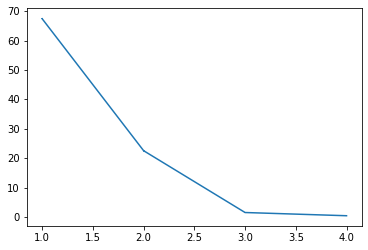

In [4]:
import matplotlib.pyplot as plt 

plt.errorbar([1,2,3,4],brightness[0::2], yerr = brightnesserror[0::2])

In [5]:
with open("../results/values/brightness_flare1_TRAPPIST-1.txt", "w+") as f:
    f.write("g , r , i, z, unit: [None] \n")
    f.write(str(brightness[0])+ ',' +  str(brightness[2])+ ',' + \
            str(brightness[4])+ ',' + str(brightness[6]) + '\n' )
    f.write(str(brightnesserror[0])+ ',' +  str(brightnesserror[2])+ ',' + \
            str(brightnesserror[4])+ ',' + str(brightnesserror[6]) + '\n' )
    


In [6]:
with open("../results/values/brightness_flare2_TRAPPIST-1.txt", "w+") as f:
    f.write("g , r , i, z, unit: [None] \n")
    f.write(str(brightness[1])+ ',' +  str(brightness[3])+ ',' + \
            str(brightness[5])+ ',' + str(brightness[7]) + '\n' )
    f.write(str(brightnesserror[1])+ ',' +  str(brightnesserror[3])+ ',' + \
            str(brightnesserror[5])+ ',' + str(brightnesserror[7]) + '\n' )
    


In [7]:
# Alternative using inbuild function, 

#not ready again!

from funcs._brightness_luminosity import brightnessnorm_flare
#gives brightness of the flare in normalized brightness and brightness error
brightnessnorm_flare(timeobs,dfs)

(array([4.52506984e+02, 1.42712541e+01, 1.51050116e+02, 6.05080978e+00,
        1.01800624e+01, 4.24348275e-01, 2.82384713e+00, 5.77041610e-02]),
 array([1.14871321, 0.10173095, 2.05387732, 0.10320362, 0.30418498,
        0.02984079, 0.41842965, 3.58541287]))

# ----------------------------------------- Not needed at the moment -------------------------

In [ ]:
brightness, brightnesserror = [],[]

#calculation of apparent brightness for all flare events in the dataframe
#above shown calculation implemented
i = 0
for df in dfs:
    for flare in range(len(timeobs)):
        #time where observation is different then zero
        #N = np.count_nonzero(aflare1(timeobs[flare], df.Tpeak[flare], df.Fwhm[flare], df.Ampl[flare]))
        timetime = timeobs[flare][aflare1(timeobs[flare], df.Tpeak[flare], df.Fwhm[flare], df.Ampl[flare]) > 0]
        #T = timetime[-1] - timetime[0] 
        #brightness of flare in bandpass devided by total flare time, to get rid of time unit
        brightness.append(tp(aflare1(timeobs[flare], df.Tpeak[flare], df.Fwhm[flare], df.Ampl[flare]))  ) #1/T
        brightnesserror.append(tp(aflare1(timeobs[flare], df.Tpeak[flare], \
                 np.max([df.sFwhm[flare],df.sfwhm[flare]]), np.max([df.sAmpl[flare],df.sampl[flare]]))) ) #1/T
    i = i + 1 

#every second entry belongs to the same flare therefore slice [0::2]
brightness = np.asarray(brightness)
brightnesserror = np.asarray(brightnesserror)

In [ ]:
'''

Notes: 

- in funcs brightness luminosity; brightnessnorm_flare does not calculate correctly at the moment because
of recent change in calculation
- review calculation of brightness!

brightness, brightnesserror = [],[]

#calculation of percentage apparent brightness change for all flare events in the dataframe
#above shown calculation implemented
i = 0
for df in dfs:
    for flare in range(len(timeobs)): 
        brightness.append(np.mean(aflare1(timeobs[flare], df.Tpeak[flare], df.Fwhm[flare], df.Ampl[flare]))  ) 
        #not stylish, conservative limit. I take the maximum from the non-symmetric FWHM and amplitude
        #values fitted;  
        brightnesserror.append(np.mean(aflare1(timeobs[flare], df.Tpeak[flare], \
                 np.max([df.sFwhm[flare],df.sfwhm[flare]]), np.max([df.sAmpl[flare],df.sampl[flare]]))) ) 
    i = i + 1 

#every second entry belongs to the same flare therefore slice [0::2]
brightness = np.asarray(brightness)
brightnesserror = np.asarray(brightnesserror)

'''